In [1]:
import nltk
# nltk.download('maxent_ne_chunker')
# nltk.download('maxent_treebank_pos_tagger')
# nltk.download('treebank')
# nltk.download('words')

print('The nltk version is {}.'.format(nltk.__version__))

The nltk version is 3.5.


# Parse Tree

In [2]:
sentence = "John went for a walk to the park with a golden statue."
tokens = nltk.word_tokenize(sentence)

In [3]:
print(tokens, '\n', len(tokens))

['John', 'went', 'for', 'a', 'walk', 'to', 'the', 'park', 'with', 'a', 'golden', 'statue', '.'] 
 13


In [4]:
tagged = nltk.pos_tag(tokens)
tagged[:]

[('John', 'NNP'),
 ('went', 'VBD'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('walk', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('park', 'NN'),
 ('with', 'IN'),
 ('a', 'DT'),
 ('golden', 'JJ'),
 ('statue', 'NN'),
 ('.', '.')]

In [5]:
entities = nltk.chunk.ne_chunk(tagged)
print(entities.__repr__()) # Instead of gs file downloading and adding it to environment variables, we can use __repr__()
                           # to avoid gs error.

Tree('S', [Tree('PERSON', [('John', 'NNP')]), ('went', 'VBD'), ('for', 'IN'), ('a', 'DT'), ('walk', 'NN'), ('to', 'TO'), ('the', 'DT'), ('park', 'NN'), ('with', 'IN'), ('a', 'DT'), ('golden', 'JJ'), ('statue', 'NN'), ('.', '.')])


In [6]:
from nltk.draw.tree import draw_trees
draw_trees(entities)

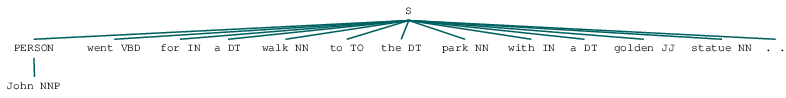

In [7]:
# If using ghostscript (gs) file method, then perform the following steps

# Download gs file from https://ghostscript.com/releases/gsdnld.html and and add its path to Environment Variables. 
# gs file may be stored at C:\Program Files\ (e.g., "C:\Program Files\gs\gs9.55.0\bin")

# Add the path to the environment variable in the advanced system settings->Environment Variables:

import os
path_to_gs = "C:/Program Files/gs/gs9.55.0/bin"
os.environ['PATH'] += os.pathsep + path_to_gs
entities = nltk.chunk.ne_chunk(tagged)
entities

# Syntax Tree

In [8]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag, word_tokenize, RegexpParser

sentence = "John went for a walk to the park with a golden statue."

tagged = pos_tag(word_tokenize(sentence))

chunker = RegexpParser("""
                       NP: {<DT>?<JJ>*<NN>}    #To extract Noun Phrases
                       P: {<IN>}               #To extract Prepositions
                       V: {<V.*>}              #To extract Verbs
                       PP: {<p> <NP>}          #To extract Prepositional Phrases
                       VP: {<V> <NP|PP>*}      #To extract Verb Phrases
                       """)
output = chunker.parse(tagged)
print("After Extracting\n", output)

After Extracting
 (S
  John/NNP
  (VP (V went/VBD))
  (P for/IN)
  (NP a/DT walk/NN)
  to/TO
  (NP the/DT park/NN)
  (P with/IN)
  (NP a/DT golden/JJ statue/NN)
  ./.)


In [9]:
output.draw()